In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

df = pd.read_csv('Twitter_Data.csv')
df.head()

,text,category
0,when modi promised “minimum government maximum...,-1.0
1,talk all the nonsense and continue all the dra...,0.0
2,what did just say vote for modi welcome bjp t...,1.0
3,asking his supporters prefix chowkidar their n...,1.0
4,answer who among these the most powerful world...,1.0


In [13]:
df['text'][1]

'talk all the nonsense and continue all the drama will vote for modi '

In [2]:
df.shape

(32004, 2)

In [3]:
df['category'].unique()

array([-1.,  0.,  1., nan])

In [4]:
df['category'] = df['category'].replace(-1 ,2)
df.head()

,text,category
0,when modi promised “minimum government maximum...,2.0
1,talk all the nonsense and continue all the dra...,0.0
2,what did just say vote for modi welcome bjp t...,1.0
3,asking his supporters prefix chowkidar their n...,1.0
4,answer who among these the most powerful world...,1.0


Here,

0 -> neutral review,
1 -> positive review,
2 -> negative review

In [5]:
df.isna().sum()

text        1
category    1
dtype: int64

In [6]:
df.dropna(inplace=True)

In [7]:
df.shape

(32002, 2)

In [8]:
df['category'].value_counts()

1.0    13569
0.0    10941
2.0     7492
Name: category, dtype: int64

Data Cleaning

In [9]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

In [10]:
# removing puntuation
df['clean_text'] = df['text'].str.replace('[^\w\s]', '')
df['clean_text'][0]

'when modi promised minimum government maximum governance expected him begin the difficult job reforming the state why does take years get justice state should and not business and should exit psus and temples'

In [11]:
import nltk
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

df['clean_text'] = df['clean_text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))
df['clean_text'][0]

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


'modi promised minimum government maximum governance expected begin difficult job reforming state take years get justice state business exit psus temples'

In [12]:
# lemmatization

nltk.download('wordnet')
nltk.download('omw-1.4')

from nltk.stem import WordNetLemmatizer
lemma = WordNetLemmatizer()
def lemmatize_words(text):
    words = text.split()
    words = [lemma.lemmatize(word,pos='v') for word in words]
    return ' '.join(words)
df['clean_text'] = df['clean_text'].apply(lemmatize_words)
df['clean_text'][0]

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


'modi promise minimum government maximum governance expect begin difficult job reform state take years get justice state business exit psus temples'

In [13]:
df.head()

,text,category,clean_text
0,when modi promised “minimum government maximum...,2.0,modi promise minimum government maximum govern...
1,talk all the nonsense and continue all the dra...,0.0,talk nonsense continue drama vote modi
2,what did just say vote for modi welcome bjp t...,1.0,say vote modi welcome bjp tell rahul main camp...
3,asking his supporters prefix chowkidar their n...,1.0,ask supporters prefix chowkidar name modi grea...
4,answer who among these the most powerful world...,1.0,answer among powerful world leader today trump...


**Analysis of the Category Column**

In [14]:
df['category'].value_counts(normalize=True)

1.0    0.424005
0.0    0.341885
2.0    0.234110
Name: category, dtype: float64

This is a better representation. About 44 percent of the 
tweets are posotive followed by positive and negative tweets.

Text(0.5, 1.0, 'Percentage of tweets per category')

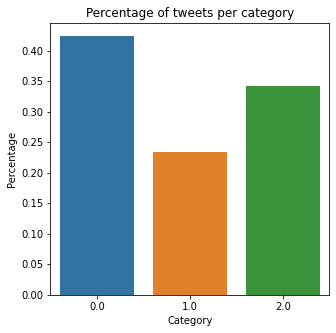

In [15]:
import seaborn as sns

plt.figure(figsize=(5, 5))
sns.barplot(x=df['category'], y=df['category'].value_counts(normalize=True))
plt.xlabel('Category')
plt.ylabel('Percentage')
plt.title('Percentage of tweets per category')

Analyzing Text Statistics

In [16]:
df['text_len'] = df['clean_text'].astype(str).apply(len)
df['text_word_count'] = df['clean_text'].apply(lambda x: len(str(x).split()))

In [17]:
df.head()

,text,category,clean_text,text_len,text_word_count
0,when modi promised “minimum government maximum...,2.0,modi promise minimum government maximum govern...,146,21
1,talk all the nonsense and continue all the dra...,0.0,talk nonsense continue drama vote modi,38,6
2,what did just say vote for modi welcome bjp t...,1.0,say vote modi welcome bjp tell rahul main camp...,74,13
3,asking his supporters prefix chowkidar their n...,1.0,ask supporters prefix chowkidar name modi grea...,135,19
4,answer who among these the most powerful world...,1.0,answer among powerful world leader today trump...,61,10


In [18]:
pos = df[df['category']==1]
neg = df[df['category']==2]
neutral = df[df['category']==0]

**Sentence length analysis** 

<AxesSubplot:xlabel='text_len', ylabel='Count'>

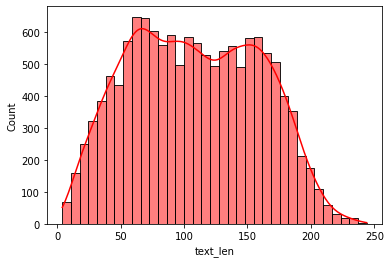

In [19]:
sns.histplot(data= pos.text_len, kde=True, color='r')

<AxesSubplot:xlabel='text_len', ylabel='Count'>

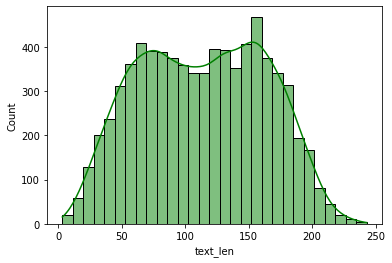

In [20]:
sns.histplot(data=neg.text_len, kde=True, color='g')

<AxesSubplot:xlabel='text_len', ylabel='Count'>

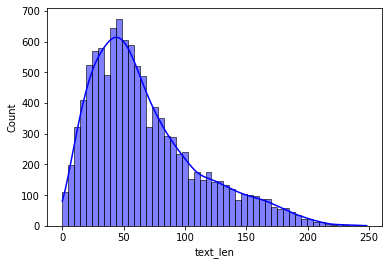

In [21]:
sns.histplot(data=neutral.text_len, kde=True, color='b')

**Dividing into training and testing set**

In [22]:
X = list(df['clean_text'])
y = list(df['category'])

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

**Define pretrained tokenizer and model**

In [23]:
pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.7/6.7 MB 93.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 71.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.2/199.2 KB 20.8 MB/s eta 0:00:00


In [24]:
from transformers import DistilBertTokenizerFast, TFDistilBertForSequenceClassification

tokenizer = DistilBertTokenizerFast.from_pretrained('distilbert-base-uncased')

In [25]:
train_encodings = tokenizer(X_train, truncation = True, padding = True  )

test_encodings = tokenizer(X_test, truncation = True, padding = True )

In [26]:
import tensorflow as tf

train_dataset = tf.data.Dataset.from_tensor_slices((
    dict(train_encodings),
    y_train
))

test_dataset = tf.data.Dataset.from_tensor_slices((
    dict(test_encodings),
    y_test
))

In [27]:
model = TFDistilBertForSequenceClassification.from_pretrained('distilbert-base-uncased', num_labels=3)

loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-5, epsilon=1e-08)

#compile the model
model.compile(optimizer=optimizer,loss=loss_fn,metrics=['accuracy'])

#train the model
model.fit(train_dataset.shuffle(100).batch(16),
              epochs=5,
              batch_size=16)

Some layers from the model checkpoint at distilbert-base-uncased were not used when initializing TFDistilBertForSequenceClassification: ['vocab_layer_norm', 'activation_13', 'vocab_transform', 'vocab_projector']
- This IS expected if you are initializing TFDistilBertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFDistilBertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some layers of TFDistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['pre_classifier', 'classifier', 'dropout_19']
You should probably TRAIN this model on a down-stream task to be able to use i

Epoch 1/5


Instructions for updating:
Lambda fuctions will be no more assumed to be used in the statement where they are used, or at least in the same block. https://github.com/tensorflow/tensorflow/issues/56089


1501/1501 [==============================] - 263s 156ms/step - loss: 0.6533 - accuracy: 0.7342
Epoch 2/5
1501/1501 [==============================] - 218s 145ms/step - loss: 0.4183 - accuracy: 0.8527
Epoch 3/5
1501/1501 [==============================] - 218s 146ms/step - loss: 0.3384 - accuracy: 0.8873
Epoch 4/5
1501/1501 [==============================] - 218s 145ms/step - loss: 0.2758 - accuracy: 0.9109
Epoch 5/5
1501/1501 [==============================] - 219s 146ms/step - loss: 0.2225 - accuracy: 0.9290


In [28]:
model.evaluate(test_dataset.shuffle(100).batch(16))

501/501 [==============================] - 35s 65ms/step - loss: 0.4847 - accuracy: 0.8556


[0.4846991002559662, 0.8556430339813232]

In [32]:
saved_model = "/sentiment_analysis_model" 

model.save_pretrained(saved_model)

tokenizer.save_pretrained(saved_model)

('/sentiment_analysis_model/tokenizer_config.json',
 '/sentiment_analysis_model/special_tokens_map.json',
 '/sentiment_analysis_model/vocab.txt',
 '/sentiment_analysis_model/added_tokens.json',
 '/sentiment_analysis_model/tokenizer.json')

In [6]:
class_dict = {'Positive Response': 1, 'Negative Response': 2, 'Neutral Response': 0}

In [7]:
import json
with open('class_dictionary', 'w') as f:
    f.write(json.dumps(class_dict))